# <font color="brown">✨&nbsp;&nbsp;Introduction</font>

Maybe you know the Mastermind game. You must guess a color combination and you have as feedback the number of pegs that have the right color and the right position and the number of pegs with the right color but a wrong position.

Here we will try to guess the correct combination with a Genetic Algorithm.

We will allow duplicated colors.

Contrary to the board game, we will not enforce a maximum amount of trial as genetic algorithms rely on evolving solutions over multiple generations and as such it is not really relevant to consider trials (what would be generations and populations then? Populations of one individual doesn't make much sense).

<img src="https://upload.wikimedia.org/wikipedia/commons/2/2d/Mastermind.jpg" width="300px">

## <font color="brown">🎳&nbsp;&nbsp;Define Game</font>

In [1]:
N_PEGS = 10 # Number of pegs to guess
N_COLORS = 10 # Number of different colors in the game

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Generate a color palette
palette = sns.color_palette(palette="cubehelix", n_colors=N_COLORS)

# Function to display the board corresponding to a given chromosome
def display_board(chromosome):
  board = np.hstack([
      np.hstack([
          np.full((20, 2, 3), (1, 1, 1)),
          np.full((20, 20, 3), palette[peg]),
      ]) for i, peg in enumerate(chromosome)
  ])

  plt.figure(dpi=90)
  plt.axis('off')
  plt.imshow(board)
  plt.show()

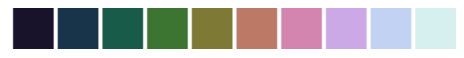

In [3]:
# See all colors
display_board([i for i in np.arange(N_COLORS)])

## <font color="brown">🎲&nbsp;&nbsp;Generate randomly a combination to guess</font>

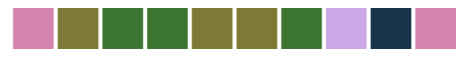

{1: 1, 3: 3, 4: 3, 6: 2, 7: 1}


In [4]:
import numpy as np

# Generate the combination to guess
correct_combination = np.random.randint(0, N_COLORS, N_PEGS)

# Display it
display_board(correct_combination)

# Create a dictionnary counting the number of each color in the solution
correct_color_count = {
    color: np.count_nonzero(correct_combination == color)
    for color in np.unique(correct_combination)
}

# Print the count of each color
print(correct_color_count)

## <font color="brown">🏋️&nbsp;&nbsp;Define fitness function</font>

In [5]:
# Score for guessing exactly a peg
SCORE_CORRECT_PEGS = 5

# Score for guessing correctly a color
SCORE_CORRECT_COLOR = 1

# The maximum score (score of the correct combination).
# Note that for a peg guessed exactly, we score points both for
# guessing exactly and for having the right color.
MAX_SCORE = SCORE_CORRECT_PEGS * N_PEGS + SCORE_CORRECT_COLOR * N_PEGS

def score_chromosome(chromosome):
    # Colors score
    colors_score = 0

    for color, color_count in correct_color_count.items():
        # We win points for each colors guessed correctly
        # but not more than the number of pegs of this colors
        # in the correct combination
        colors_score += min(np.count_nonzero(chromosome == color), color_count)

    colors_score *= SCORE_CORRECT_COLOR

    # Correct pegs score
    correct_peg_score = np.count_nonzero(np.array(chromosome) == correct_combination)
    correct_peg_score *= SCORE_CORRECT_PEGS

    return colors_score + correct_peg_score

def fitness_function(ga_instance, solution, solution_idx):
    return score_chromosome(solution)

## <font color="brown">☎️&nbsp;&nbsp;Define Callbacks </font>

In [6]:
def on_generation(ga_instance):
    solution, solution_fitness, solution_idx = ga_instance.best_solution()
    print("Generation: ", ga_instance.generations_completed, ". Fitness: ", solution_fitness)
    solution_image = display_board(solution)

## <font color="brown">🚀&nbsp;&nbsp;Run genetic algorithm</font>

In [7]:
%pip install pygad

Note: you may need to restart the kernel to use updated packages.


Generation:  1 . Fitness:  26


C:\Users\babac\miniconda3\envs\MIN\Lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


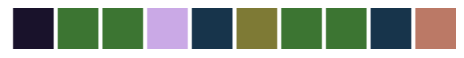

Generation:  2 . Fitness:  26


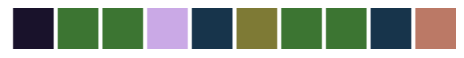

Generation:  3 . Fitness:  26


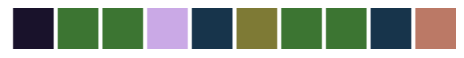

Generation:  4 . Fitness:  26


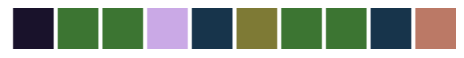

Generation:  5 . Fitness:  26


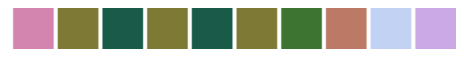

Generation:  6 . Fitness:  26


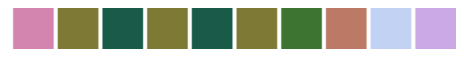

Generation:  7 . Fitness:  27


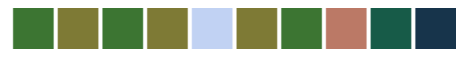

Generation:  8 . Fitness:  27


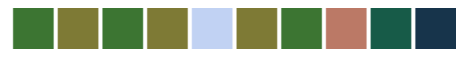

Generation:  9 . Fitness:  32


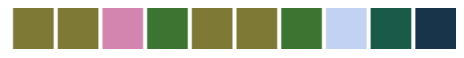

Generation:  10 . Fitness:  32


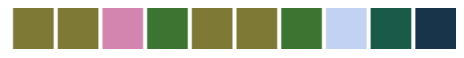

Generation:  11 . Fitness:  37


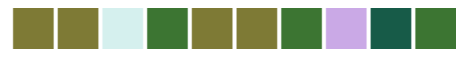

Generation:  12 . Fitness:  37


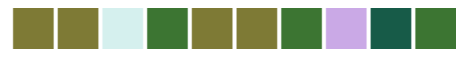

Generation:  13 . Fitness:  37


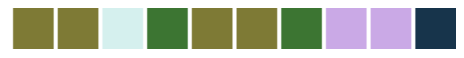

Generation:  14 . Fitness:  37


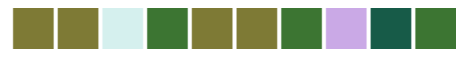

Generation:  15 . Fitness:  37


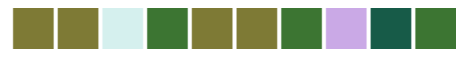

Generation:  16 . Fitness:  37


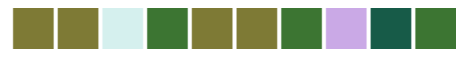

Generation:  17 . Fitness:  37


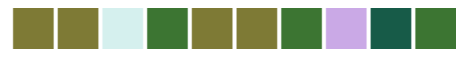

Generation:  18 . Fitness:  37


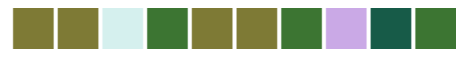

Generation:  19 . Fitness:  37


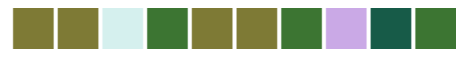

Generation:  20 . Fitness:  37


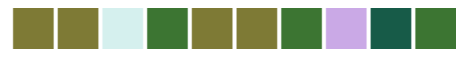

Generation:  21 . Fitness:  37


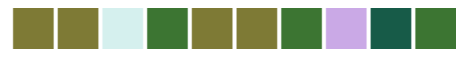

Generation:  22 . Fitness:  37


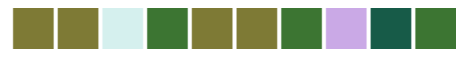

Generation:  23 . Fitness:  37


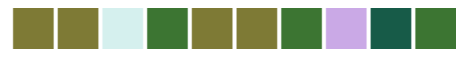

Generation:  24 . Fitness:  37


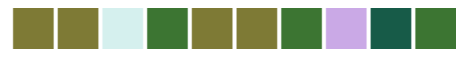

Generation:  25 . Fitness:  37


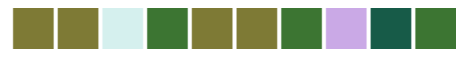

Generation:  26 . Fitness:  37


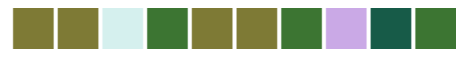

Generation:  27 . Fitness:  37


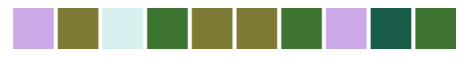

Generation:  28 . Fitness:  37


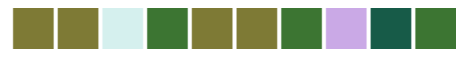

Generation:  29 . Fitness:  37


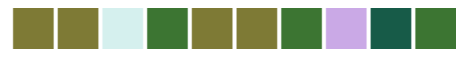

Generation:  30 . Fitness:  37


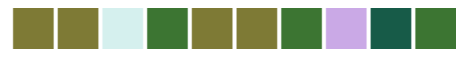

Generation:  31 . Fitness:  37


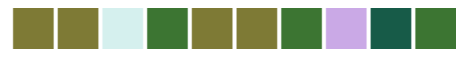

Generation:  32 . Fitness:  37


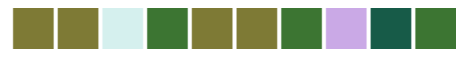

Generation:  33 . Fitness:  37


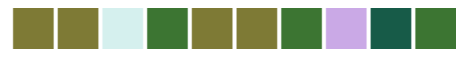

Generation:  34 . Fitness:  37


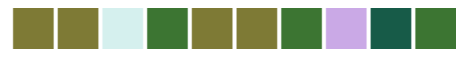

Generation:  35 . Fitness:  37


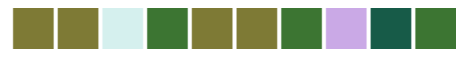

Generation:  36 . Fitness:  37


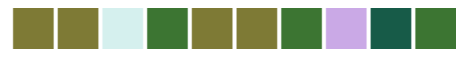

Generation:  37 . Fitness:  37


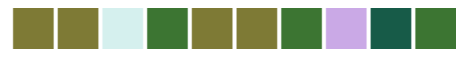

Generation:  38 . Fitness:  37


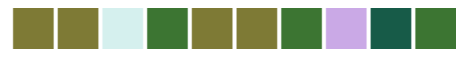

Generation:  39 . Fitness:  37


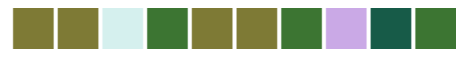

Generation:  40 . Fitness:  37


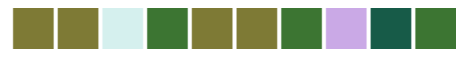

Generation:  41 . Fitness:  37


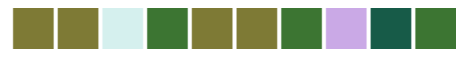

Generation:  42 . Fitness:  38


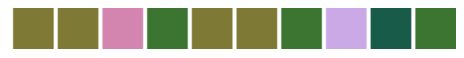

Generation:  43 . Fitness:  38


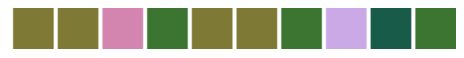

Generation:  44 . Fitness:  38


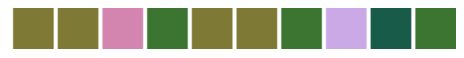

Generation:  45 . Fitness:  38


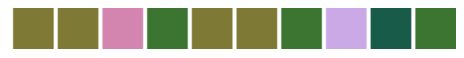

Generation:  46 . Fitness:  38


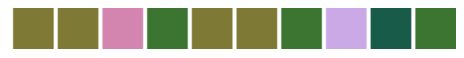

Generation:  47 . Fitness:  38


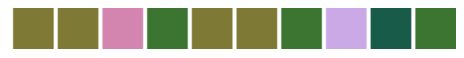

Generation:  48 . Fitness:  38


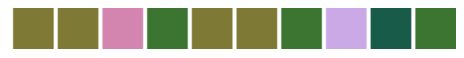

Generation:  49 . Fitness:  38


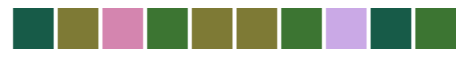

Generation:  50 . Fitness:  38


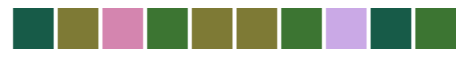

Generation:  51 . Fitness:  38


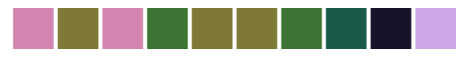

Generation:  52 . Fitness:  38


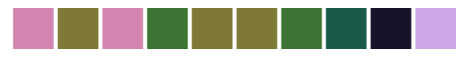

Generation:  53 . Fitness:  38


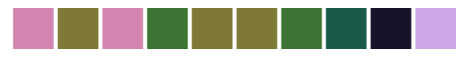

Generation:  54 . Fitness:  38


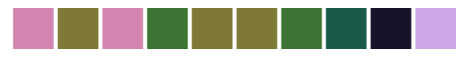

Generation:  55 . Fitness:  39


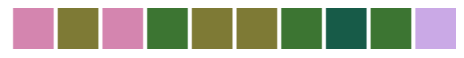

Generation:  56 . Fitness:  39


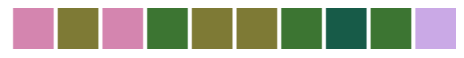

Generation:  57 . Fitness:  43


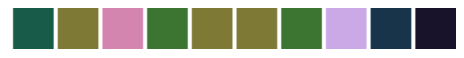

Generation:  58 . Fitness:  43


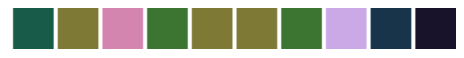

Generation:  59 . Fitness:  49


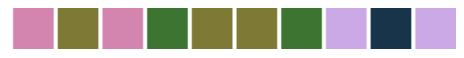

Generation:  60 . Fitness:  49


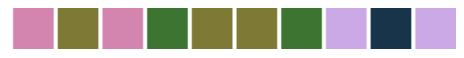

Generation:  61 . Fitness:  49


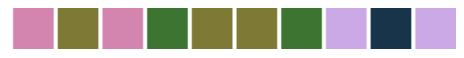

Generation:  62 . Fitness:  49


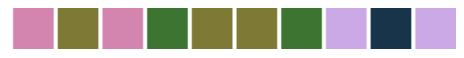

Generation:  63 . Fitness:  49


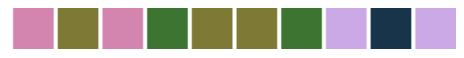

Generation:  64 . Fitness:  49


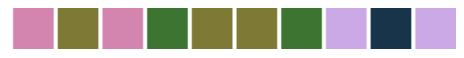

Generation:  65 . Fitness:  49


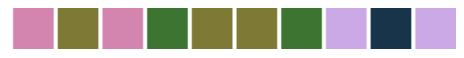

Generation:  66 . Fitness:  49


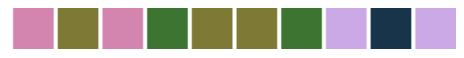

Generation:  67 . Fitness:  49


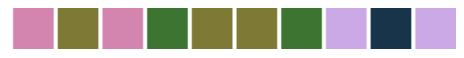

Generation:  68 . Fitness:  49


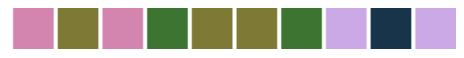

Generation:  69 . Fitness:  49


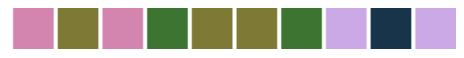

Generation:  70 . Fitness:  49


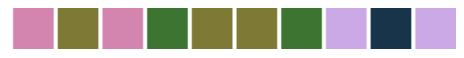

Generation:  71 . Fitness:  49


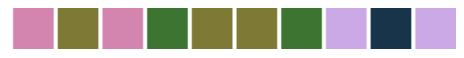

Generation:  72 . Fitness:  49


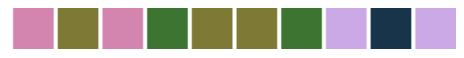

Generation:  73 . Fitness:  49


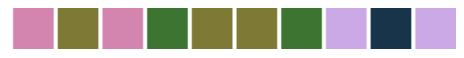

Generation:  74 . Fitness:  49


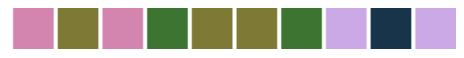

Generation:  75 . Fitness:  49


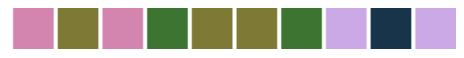

Generation:  76 . Fitness:  49


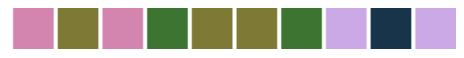

Generation:  77 . Fitness:  49


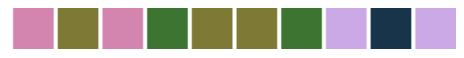

Generation:  78 . Fitness:  49


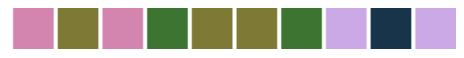

Generation:  79 . Fitness:  49


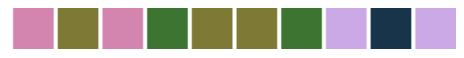

Generation:  80 . Fitness:  49


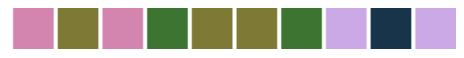

Generation:  81 . Fitness:  54


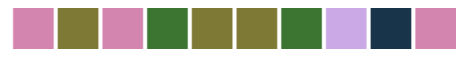

Generation:  82 . Fitness:  54


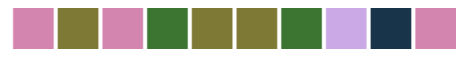

Generation:  83 . Fitness:  54


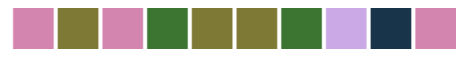

Generation:  84 . Fitness:  54


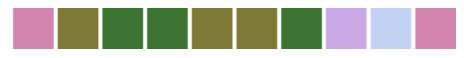

Generation:  85 . Fitness:  54


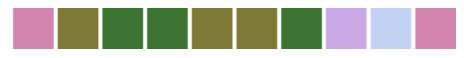

Generation:  86 . Fitness:  54


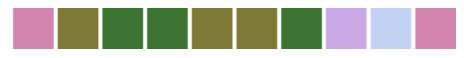

Generation:  87 . Fitness:  54


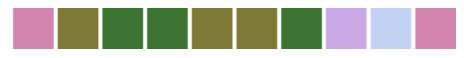

Generation:  88 . Fitness:  60


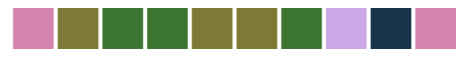

In [8]:
import pygad

ga_instance = pygad.GA(
    sol_per_pop=50,
    num_genes=N_PEGS,
    num_generations=1000,
    num_parents_mating=4,
    fitness_func=fitness_function,
    gene_type=int,
    init_range_low=0,
    init_range_high=(N_COLORS - 1),
    on_generation=on_generation,
    mutation_type="random",
    mutation_probability=0.10,
    mutation_by_replacement=True,
    random_mutation_min_val=0.0,
    random_mutation_max_val=N_COLORS,
    crossover_type="uniform",
    crossover_probability=0.8,
    parent_selection_type="rws", # roulette wheel selection
    stop_criteria=f"reach_{MAX_SCORE}"
)

ga_instance.run()

## <font color="brown">🤪&nbsp;&nbsp;Comparison with brute-force search</font>

Here you can try to find the correct combination with a brute-force approach. See how much more time it would take to find it that way (excepted if you're lucky and the correct combination is in the first solutions tried...).

Don't run it until the solution is found.

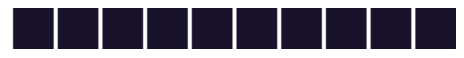

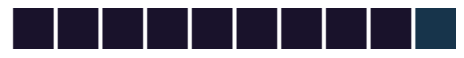

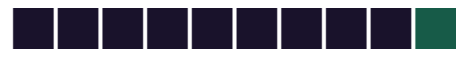

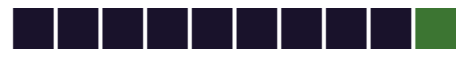

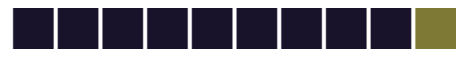

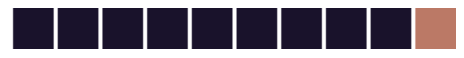

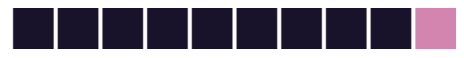

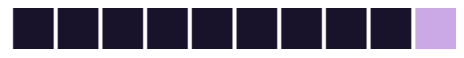

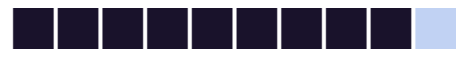

KeyboardInterrupt: 

In [11]:
import itertools

for combination in itertools.product(np.arange(N_COLORS), repeat=N_PEGS):
    display_board(combination)

    if score_chromosome(combination) == MAX_SCORE:
        break

## <font color="brown">🎯&nbsp;&nbsp; Your task</font>

- Adapt the code to be able to find a sentence of 28 characters instead (only all caps A-Z characters and blank space).

## <font color="brown">📖&nbsp;&nbsp; Report</font>

1. With your code, what would be the chromosome for the sentence "METHINKS IT IS LIKE A WEASEL"?

**Submit your notebook as well**